# EDA

## Importing libraries

In [1]:
import pandas as pd
from datasets import load_from_disk
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
from pathlib import Path

In [2]:
path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading data

In [3]:
data = load_from_disk(f"{path}/data/resume_jd_fit_dataset")
data

DatasetDict({
    train: Dataset({
        features: ['resume_text', 'job_description_text', 'label'],
        num_rows: 6241
    })
    test: Dataset({
        features: ['resume_text', 'job_description_text', 'label'],
        num_rows: 1759
    })
})

In [4]:
df = pd.concat([pd.DataFrame(data['train']), pd.DataFrame(data['test'])])
df

,resume_text,job_description_text,label
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit
...,...,...,...
1754,SummaryHighly motivated Sales Associate with e...,"Position Type: Full-Time, W2 Direct Hire. (Mus...",Good Fit
1755,SummaryWireless communications engineer with e...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",Good Fit
1756,Professional ProfileCapable International Tax ...,"Backed by a leading growth equity firm, an LA ...",Good Fit
1757,SummaryData Engineeringwith experience in Desi...,Allergan Data Labs is on a mission to transfor...,Good Fit


## Target Label

In [5]:
def count_plot(df, col):
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 6))
    
    # Create the count plot
    ax = sns.countplot(data=df, y=col, palette="Set1", order=df[col].value_counts().index, hue=col, legend=False)
    
    # Calculate and annotate percentages
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        x = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10, color='black')

    # Set plot titles and labels
    plt.title(f"Count Plot - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()

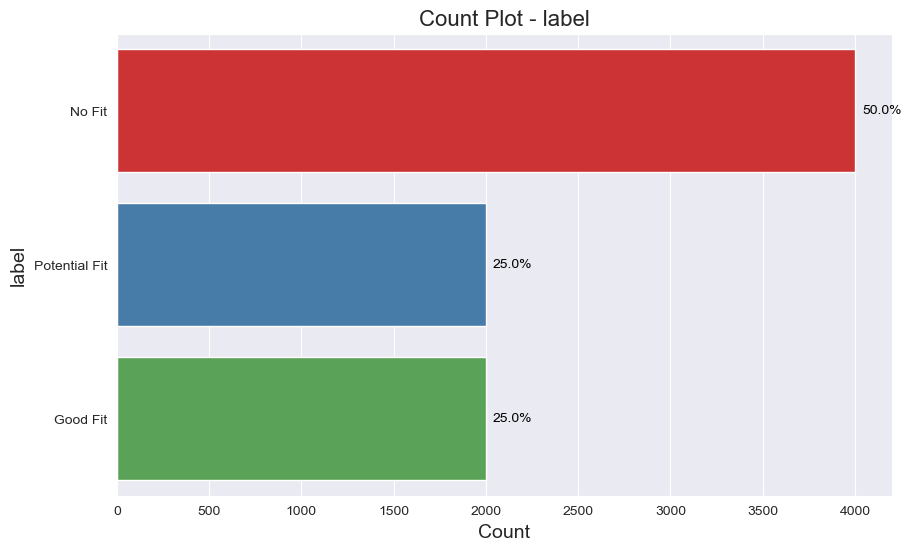

In [6]:
count_plot(df, 'label')

## Understanding text lengths

In [7]:
df['resume_length'] = df['resume_text'].apply(lambda x: len(x))
df['jd_length'] = df['job_description_text'].apply(lambda x: len(x))

df

,resume_text,job_description_text,label,resume_length,jd_length
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,6698,3958
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,6573,3808
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,7208,3193
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,5695,1097
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,12978,6174
...,...,...,...,...,...
1754,SummaryHighly motivated Sales Associate with e...,"Position Type: Full-Time, W2 Direct Hire. (Mus...",Good Fit,8837,1865
1755,SummaryWireless communications engineer with e...,"Location: Tampa, FL\nExp: 7-10 Yrs\nSPOC: Tush...",Good Fit,4024,3789
1756,Professional ProfileCapable International Tax ...,"Backed by a leading growth equity firm, an LA ...",Good Fit,1763,1553
1757,SummaryData Engineeringwith experience in Desi...,Allergan Data Labs is on a mission to transfor...,Good Fit,14886,6737


### Statistics

In [8]:
df[['resume_length', 'jd_length']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,resume_length,jd_length
count,8000.00,8000.00
mean,5773.37,2777.03
std,2958.11,1777.25
min,897.00,72.00
5%,2287.00,425.00
25%,4234.00,1309.00
50%,5123.00,2401.00
75%,6603.00,3985.00
95%,12367.00,5954.00
max,25364.00,8171.00


### Histograms

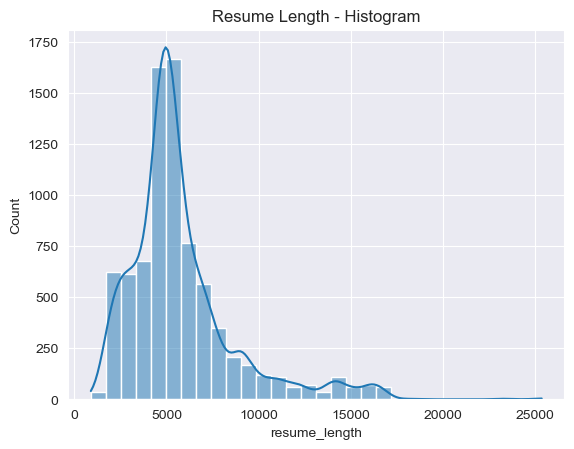

In [9]:
# For Resume Length
sns.set_style("darkgrid")
sns.histplot(data=df, x='resume_length', bins = 30, kde=True)
plt.title("Resume Length - Histogram")
plt.show()

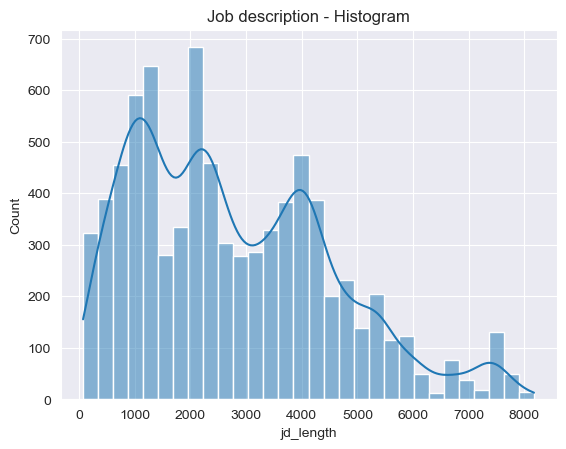

In [10]:
# For Job description Length
sns.set_style("darkgrid")
sns.histplot(data=df, x='jd_length', bins = 30, kde=True)
plt.title("Job description - Histogram")
plt.show()

### Length w.r.t. target

In [11]:
def length_with_target(df, label):
    temp = df[df['label'] == label].copy()
    display(temp[['resume_length', 'jd_length']].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2))
    
    sns.set_style("darkgrid")   
    
    # For Resume Length
    sns.histplot(data=temp, x='resume_length', bins = 30, kde=True)
    plt.title("Resume Length - Histogram")
    plt.show()
    
    # For Job description Length
    sns.histplot(data=temp, x='jd_length', bins = 30, kde=True)
    plt.title("Job description - Histogram")
    plt.show()
    

,resume_length,jd_length
count,4000.00,4000.00
mean,5800.25,2735.45
std,3032.01,1802.33
min,897.00,72.00
5%,2304.00,359.00
25%,4234.00,1213.00
50%,5134.00,2384.00
75%,6552.00,4000.00
95%,12367.00,5954.00
max,25364.00,8171.00


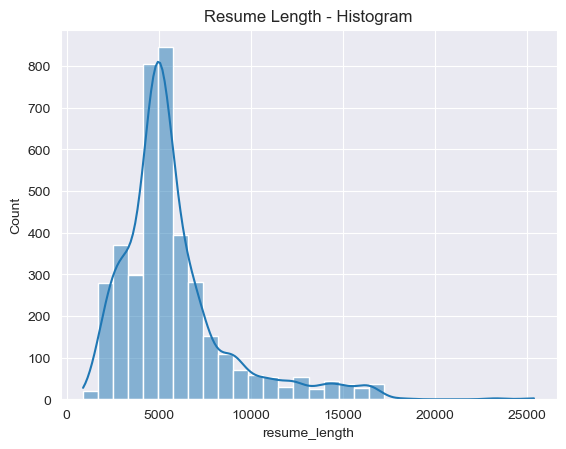

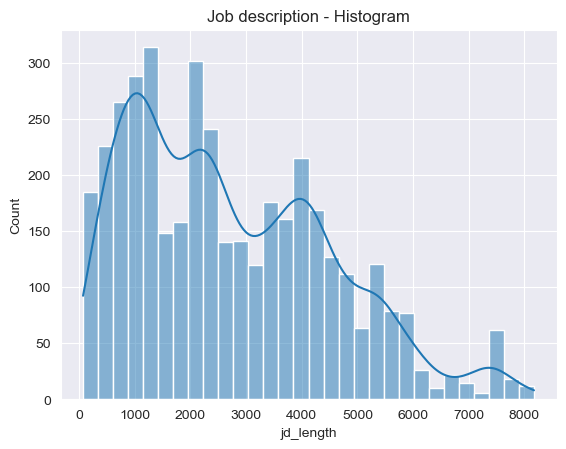

In [12]:
length_with_target(df, 'No Fit')

,resume_length,jd_length
count,2000.00,2000.00
mean,5780.56,2655.95
std,2895.05,1817.17
min,1547.00,72.00
5%,2293.65,329.10
25%,4382.75,1139.00
50%,5047.00,2281.50
75%,6609.50,3814.00
95%,12367.00,5961.70
max,25364.00,7841.00


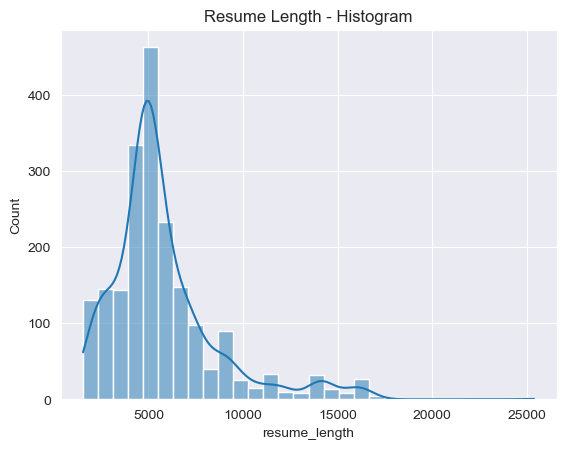

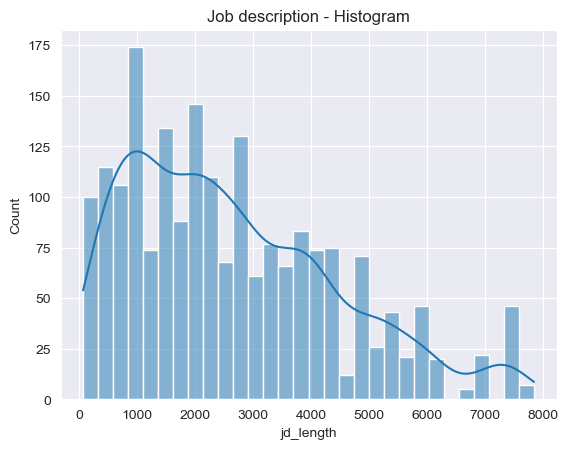

In [13]:
length_with_target(df, 'Potential Fit')

,resume_length,jd_length
count,2000.00,2000.00
mean,5712.42,2981.28
std,2870.10,1667.00
min,1547.00,267.00
5%,2138.00,871.00
25%,4024.75,1558.00
50%,5135.00,2668.00
75%,6573.00,4102.00
95%,11223.15,6614.00
max,25364.00,8171.00


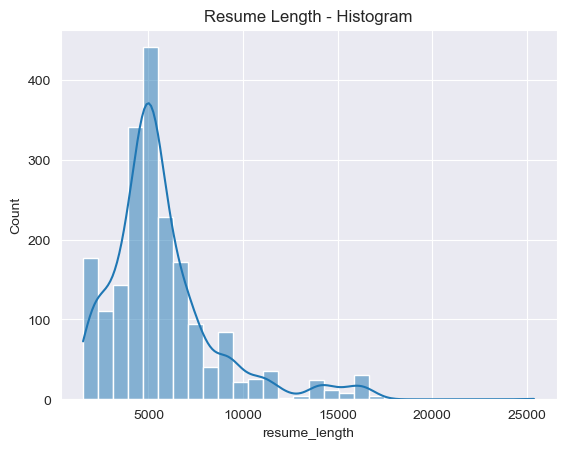

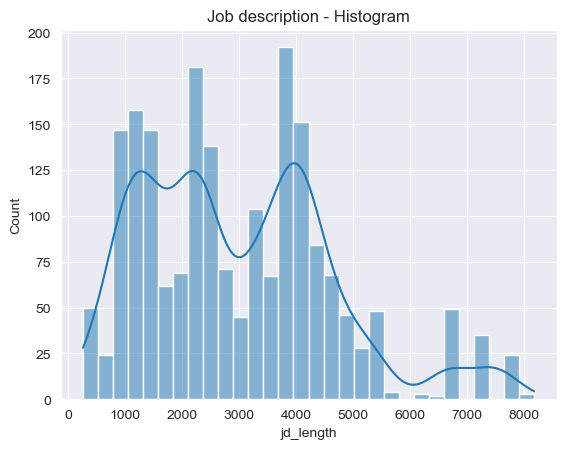

In [14]:
length_with_target(df, 'Good Fit')

## Understanding Uniqueness

In [15]:
print('Total Resume texts available:', df.shape[0])
print('Unique Resume texts in the data:', df['resume_text'].nunique())

Total Resume texts available: 8000
Unique Resume texts in the data: 643


In [16]:
print('Total Job Description texts available:', df.shape[0])
print('Unique Job Description texts in the data:', df['job_description_text'].nunique())

Total Job Description texts available: 8000
Unique Job Description texts in the data: 351


In [17]:
# Checking if any combination of resume text and jd text have two different labels.
grouped = df[['resume_text', 'job_description_text', 'label']].groupby(['resume_text', 'job_description_text']).agg(list).copy()
grouped['len'] = grouped['label'].apply(lambda x: len(x))

In [20]:
bad_records = grouped[grouped['len'] > 1].reset_index().copy()
bad_records

,resume_text,job_description_text,label,len
0,Professional SummaryBusiness Intelligence Cons...,"ROR Partners is a rapidly growing, client-driv...","[No Fit, Potential Fit]",2
1,ProfileOver 4 Years of Business Intelligence /...,Role - Business Analyst - Mobile Location - Lo...,"[No Fit, Good Fit]",2
2,QUALIFICATIONS• Over two years' experience o...,Calling all data nerds who love finance! \nIf ...,"[No Fit, Good Fit]",2
3,SummaryDynamic and motivated IT professional w...,Business Analyst Location: Remote.Duration: 12...,"[No Fit, Good Fit]",2
4,SummaryHighly motivated Sales Associate with e...,Alexander Technology Group is currently exclus...,"[No Fit, Potential Fit]",2
5,SummaryHighly proficient Business Analyst with...,"The Senior Manager, Data Architecture & Data E...","[No Fit, No Fit]",2
6,SummaryPursue a challenging and rewarding posi...,Cloud and Things is a leading provider of IT s...,"[No Fit, Good Fit]",2


We can see that 7 resume JD combinations have two labels and 6 of these have different labels for the same combination. Its not just the question of ignoring these records, but raises a concern over the entire dataset. There is no data card for this dataset on Huggingface, therefore, we do not know how this data was collected.

Plan of Action:

- First Read the above texts completely to understand what the actual labels might be.
- Analyze at least 100 records in random to see if there are labels are consistent.
- If the analysis is consistent, we can proceed with the labels.
- If the analysis fails, then the best course of action would be to manually label.
- Another option would be to use LLM to assign a label directly with prompt engineering. But again, these have to be verified thoroughly
- Another option would be to use LLM to generate synthetic data, which would be time taking and costly operation, but would eliminate the need for re-structuring the resume. Calls for additional research as well, to learn about using LLMs to generate synthetic data